In [9]:
import csv
import numpy as np

path = '../.idea/newMatrix20categories/'

with open(path + 'matrix-pl-20211020', 'r', encoding='UTF-8') as file:
    matrix_raw = file.readlines()
    del matrix_raw[0]
    matrix = []
    article_id = []
    for row in matrix_raw:
        splitted_row = row.split()
        article_id.append(splitted_row[0])
        del splitted_row[0]
        matrix.append(splitted_row)

with open(path + 'cats_dict-pl-20211020', 'r', encoding='UTF-8') as file:
    data_iter = csv.reader(file, delimiter = '\t')
    data = [data for data in data_iter]
categories_dict = {int(i[1]):i[0] for i in data}

with open(path + 'categories-pl-20211020', 'r', encoding='UTF-8') as file:
    data_iter = csv.reader(file, delimiter = '\t')
    data = [data for data in data_iter]
categories_articles = np.asarray(data, dtype=np.int32)

with open(path + 'articles_dict-pl-20211020', 'r', encoding='UTF-8') as file:
    data_iter = csv.reader(file, delimiter = '\t')
    data = [data for data in data_iter]
articles_dict = {int(i[1]):i[0] for i in data}

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = np.array(matrix, dtype=np.int32)
y = categories_articles[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y)



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][0.92186041 0.90690476 0.92125812 0.89117647 0.88897876]
Accuracy: 0.91 (+/- 0.01)
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

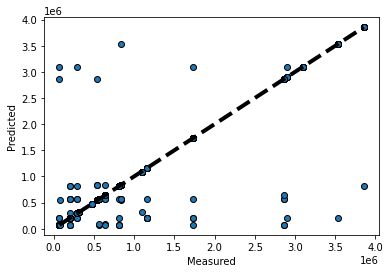

In [11]:
#SVM (LinearSVC)

from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
m_LinearSVC = LinearSVC(tol=1.0e-6,max_iter=5000,verbose=1)
#m_LinearSVC.fit(X_train, y_train)
#m_LinearSVC.predict(X_test)
scores = cross_val_score(m_LinearSVC, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_LinearSVC, X, y, cv=5)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

[0.61605859 0.43035714 0.48239719 0.38762255 0.37158847]
Accuracy: 0.46 (+/- 0.09)


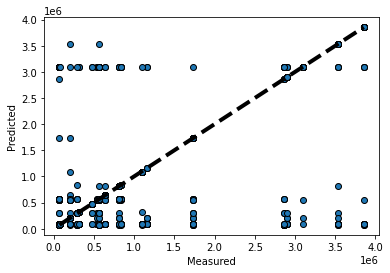

In [12]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
m_KNN = KNeighborsClassifier()
scores = cross_val_score(m_KNN, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_KNN, X, y, cv=5)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

[0.8752381  0.88258929 0.90258929 0.92161765 0.86321078]
Accuracy: 0.89 (+/- 0.02)


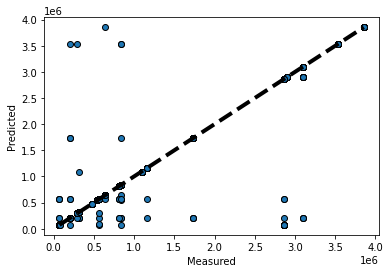

In [13]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
m_MNB = MultinomialNB()
scores = cross_val_score(m_MNB, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_MNB, X, y, cv=5)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

[0.86607143 0.92607143 0.95554383 0.85943978 0.86909314]
Accuracy: 0.90 (+/- 0.04)


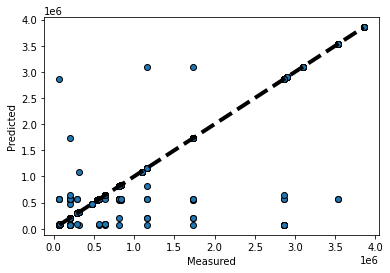

In [15]:
#Multi-layer Perceptron (bardzo długo się robi)
from sklearn.neural_network import MLPClassifier
m_MLP = MLPClassifier()
scores = cross_val_score(m_MLP, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_MLP, X, y, cv=5)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

[0.81422736 0.62639881 0.73066288 0.67957925 0.63545752]
Accuracy: 0.70 (+/- 0.07)


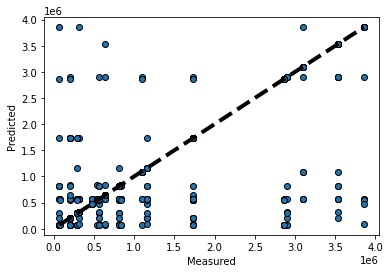

In [28]:
#Multi-layer Perceptron z PCA
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# kompresja wymiarów - PCA
pca = PCA()
X_pca = pca.fit(X).transform(X)

m_MLP = MLPClassifier()
scores = cross_val_score(m_MLP, X_pca, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_MLP, X_pca, y, cv=5)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [26]:
from sklearn.manifold import MDS

# kompresja wymiarów - MDS
embedding = MDS(n_components=5000)
X_mds = embedding.fit_transform(X)

[0.80348331 0.80517857 0.84786526 0.80004027 0.75446078]
Accuracy: 0.80 (+/- 0.03)


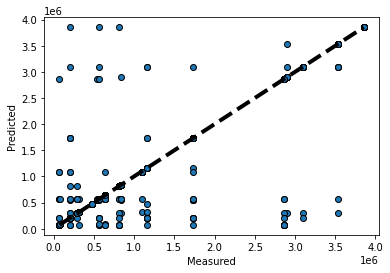

In [27]:
#Multi-layer Perceptron z MDS

from sklearn.neural_network import MLPClassifier


m_MLP = MLPClassifier()
scores = cross_val_score(m_MLP, X_mds, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_MLP, X_mds, y, cv=5)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [7]:
# Przygotowanie bag of words
from numpy import genfromtxt, int32
my_data = genfromtxt('../.idea/matrix-pl-20211020', dtype = int32, skip_header = 1, delimiter=' ')
bag_of_words = dict()

for row in my_data:
    row_dict = dict()
    for i, word_count in enumerate(row[1:], start = 1):
        if word_count > 0:
            row_dict[i] = word_count
    bag_of_words[row[0]] = row_dict


OSError: ../.idea/po_słowach_integers-po_slowach-matrix-pl-20211020 not found.